# **Análisis de Variables Categóricas 📊**

En este notebook analizaremos el comportamiento de las variables cualitativas del Hospital San Carlos. El objetivo es identificar patrones visuales y confirmar la magnitud del desbalanceo de clases antes de proceder al modelado.

### **1. Configuración y Carga**
Primero, preparamos el entorno con las librerías de visualización seaborn y matplotlib.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el dataset limpio generado en el paso anterior
df = pd.read_csv('dataset/healthcare-dataset-stroke-clean.csv')

# Definimos el estilo visual
sns.set_theme(style="whitegrid")

# Vemos las primeras filas del DataFrame
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### **Distribución de la Variable Objetivo (Stroke)**
Como observamos en el conteo previo, la clase está altamente desbalanceada. Visualizarlo nos ayuda a dimensionar el reto para el algoritmo.

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_4296\3172533922.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='stroke', palette='viridis')


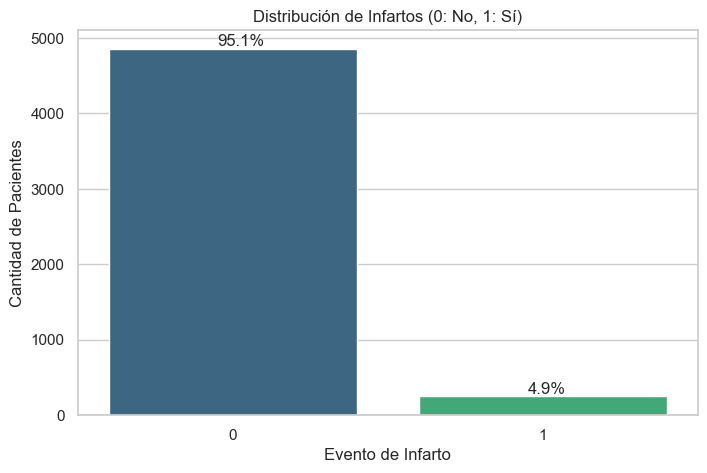

In [6]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='stroke', palette='viridis')
plt.title('Distribución de Infartos (0: No, 1: Sí)')
plt.xlabel('Evento de Infarto')
plt.ylabel('Cantidad de Pacientes')

# Añadir etiquetas de porcentaje sobre las barras
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), size = 12, va='bottom')

plt.show()

### **Análisis de Perfil Poblacional (Univariado)**
Antes de analizar la incidencia de infartos, realizamos un diagnóstico de la composición de nuestra muestra. Este paso nos permite identificar si existe un sesgo en la recolección de datos (por ejemplo, si el hospital atiende predominantemente a un sector laboral o a un género específico).

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_4296\1348644582.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, ax=ax1, palette='Set1', order=df[col].value_counts().index)


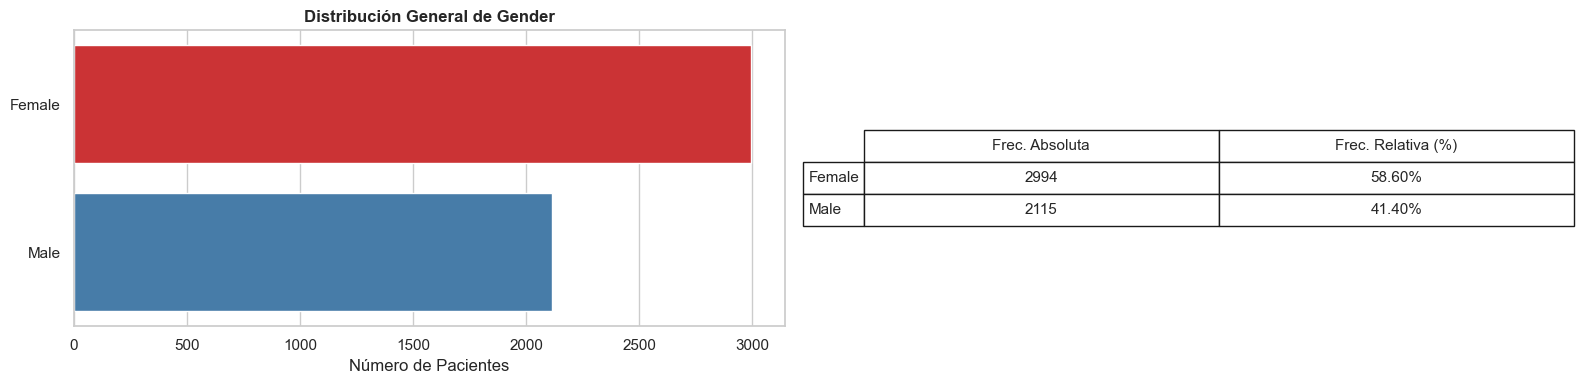

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_4296\1348644582.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, ax=ax1, palette='Set1', order=df[col].value_counts().index)


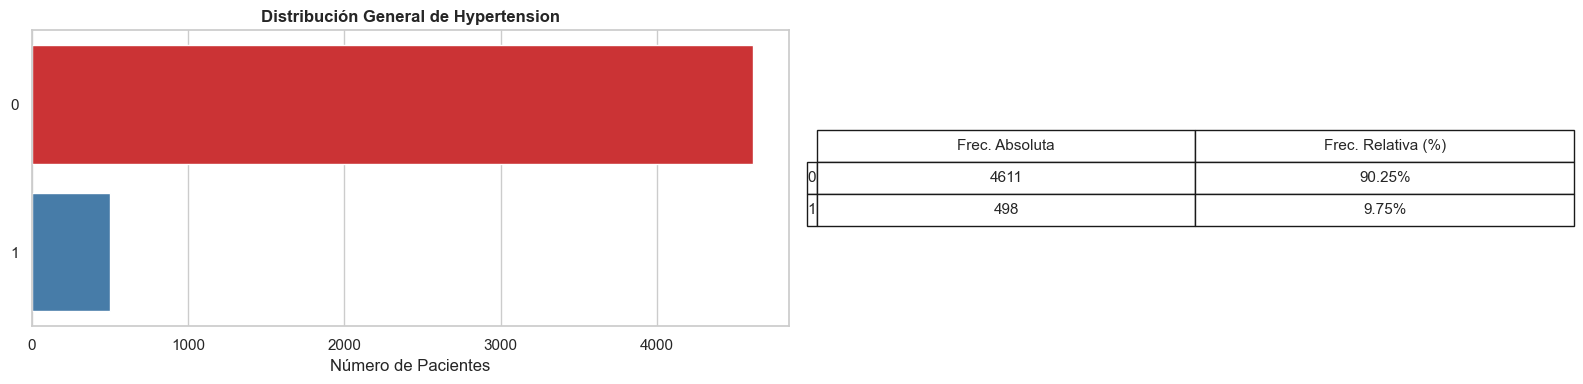

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_4296\1348644582.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, ax=ax1, palette='Set1', order=df[col].value_counts().index)


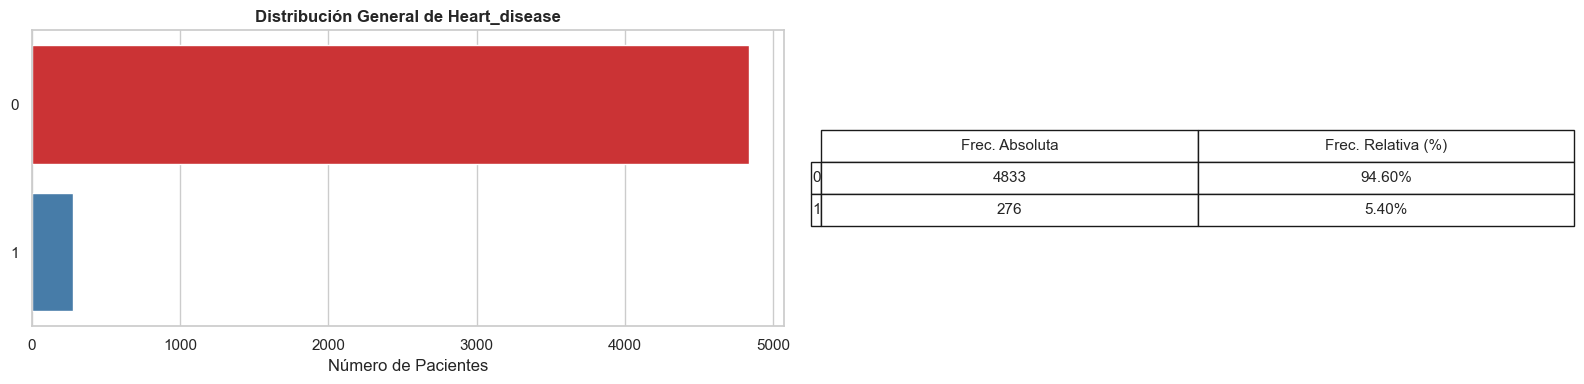

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_4296\1348644582.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, ax=ax1, palette='Set1', order=df[col].value_counts().index)


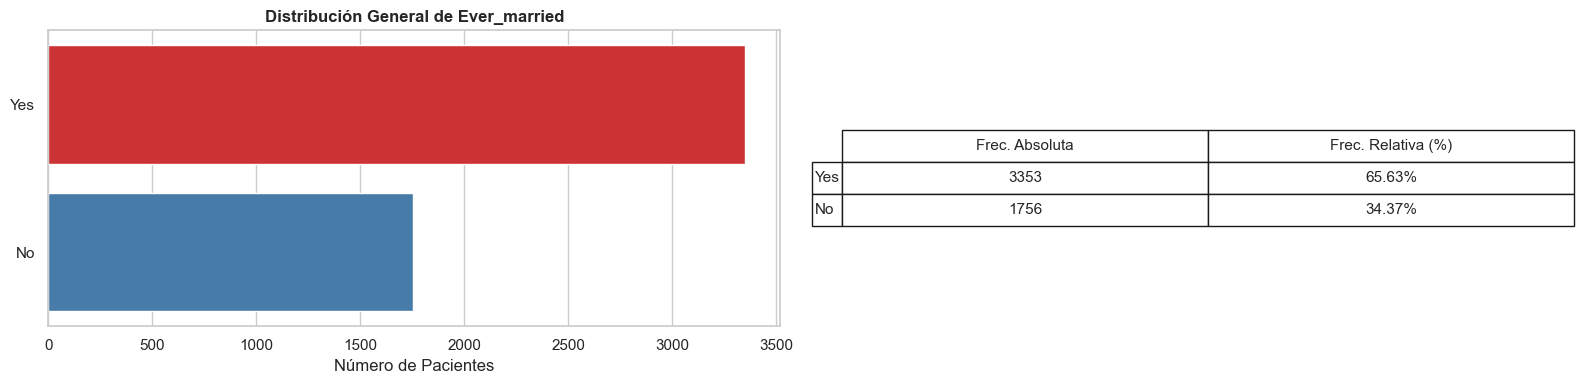

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_4296\1348644582.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, ax=ax1, palette='Set1', order=df[col].value_counts().index)


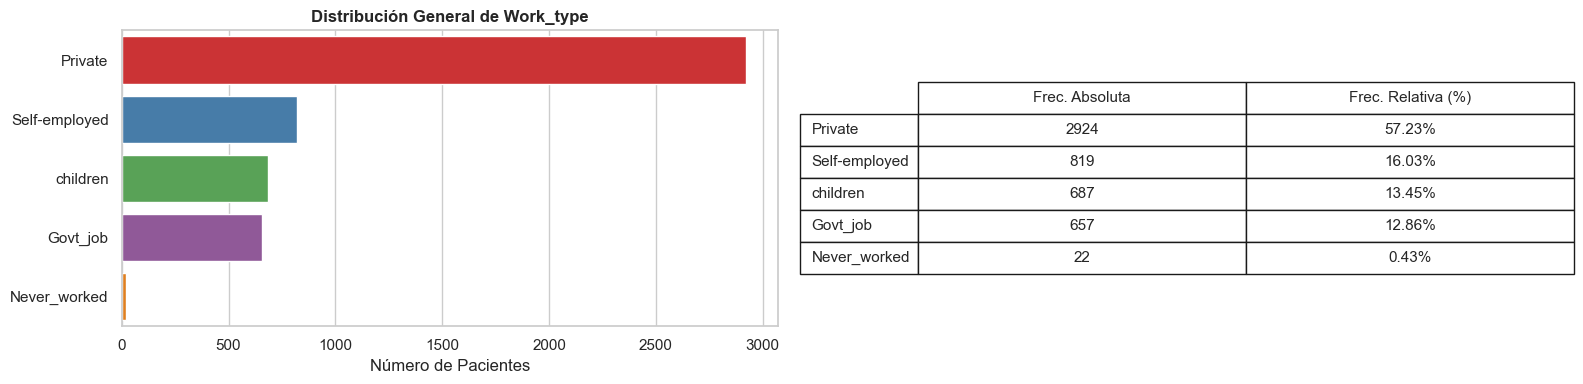

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_4296\1348644582.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, ax=ax1, palette='Set1', order=df[col].value_counts().index)


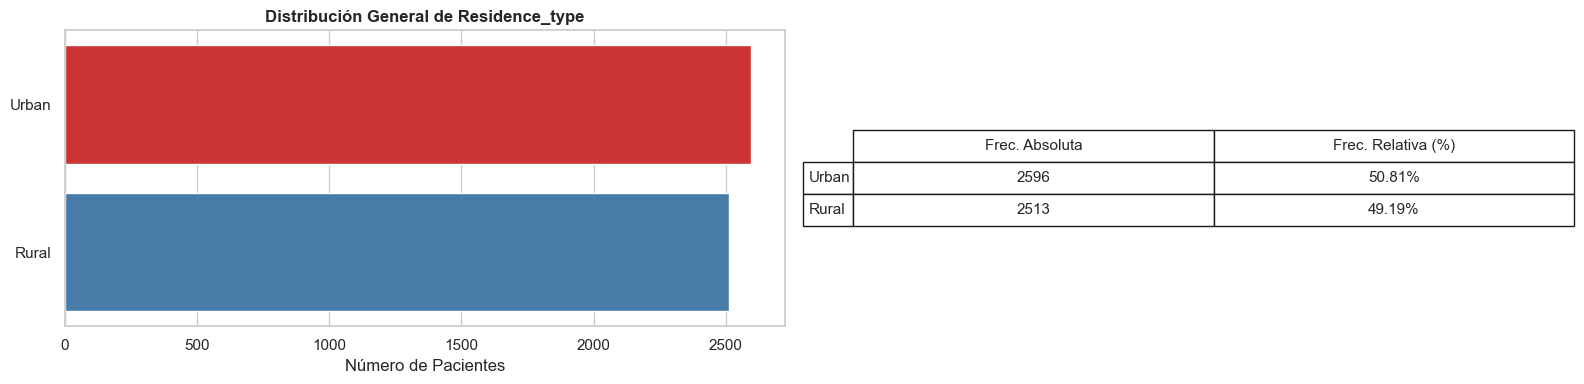

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_4296\1348644582.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, ax=ax1, palette='Set1', order=df[col].value_counts().index)


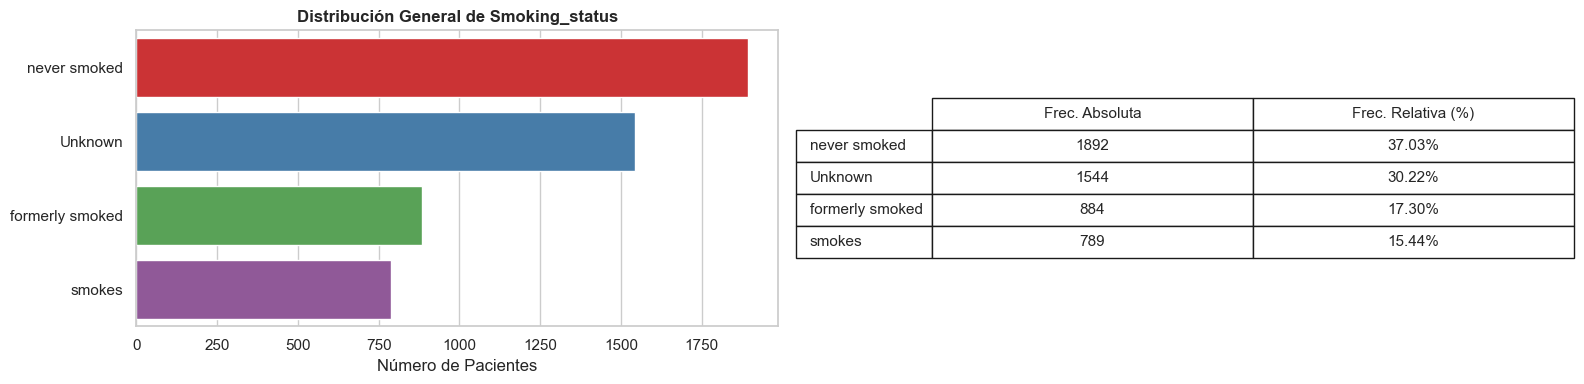

In [20]:
# Lista de variables categóricas
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                    'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    # 1. Crear el contenedor (1 fila, 2 columnas)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
    
    # 2. Gráfico de Barras Laterales (Frecuencia Absoluta)
    # No usamos 'hue' porque estamos analizando la variable por sí sola
    sns.countplot(data=df, y=col, ax=ax1, palette='Set1', order=df[col].value_counts().index)
    ax1.set_title(f'Distribución General de {col.capitalize()}', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Número de Pacientes')
    ax1.set_ylabel('')
    
    # 3. Cálculo de Tabla de Frecuencias
    abs_freq = df[col].value_counts()
    rel_freq = df[col].value_counts(normalize=True) * 100
    
    stats_df = pd.DataFrame({
        'Frec. Absoluta': abs_freq,
        'Frec. Relativa (%)': rel_freq.map('{:.2f}%'.format)
    })
    
    # 4. Dibujar la tabla al lado
    ax2.axis('off')
    tabla = ax2.table(cellText=stats_df.values, 
                      colLabels=stats_df.columns, 
                      rowLabels=stats_df.index,
                      loc='center', 
                      cellLoc='center')
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(11)
    tabla.scale(1.0, 2.0)
    
    plt.tight_layout()
    plt.show()

###  **Relación de Variables Categóricas con el Infarto**
Analizaremos cómo influyen las condiciones médicas previas y los hábitos en la incidencia del infarto.

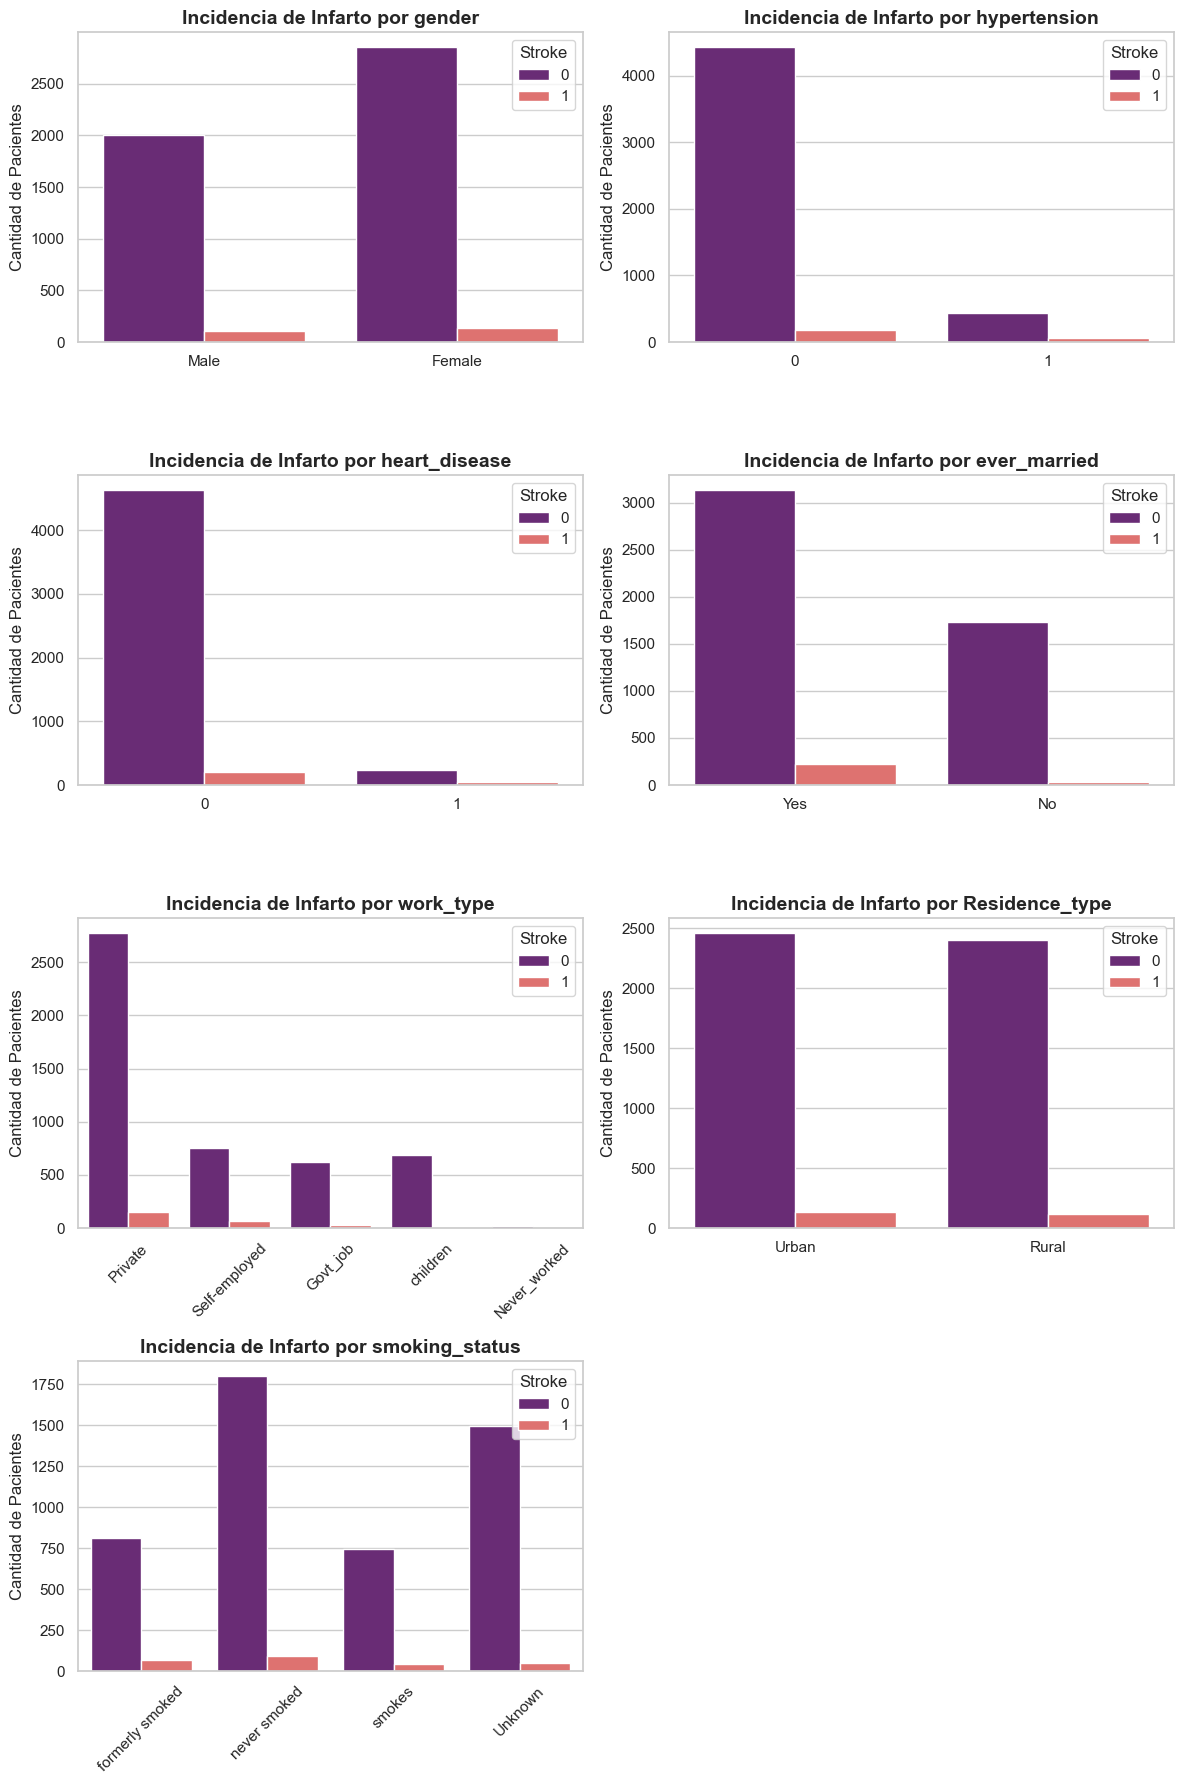

In [16]:
# Lista de variables a analizar (7 variables)
cols_to_plot = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                'work_type', 'Residence_type', 'smoking_status']

# Configuramos una cuadrícula de 4 filas y 2 columnas para dar espacio vertical
# figsize=(12, 18) permite que cada gráfico sea lo suficientemente alto
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 18))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    sns.countplot(data=df, x=col, hue='stroke', ax=axes[i], palette='magma')
    axes[i].set_title(f'Incidencia de Infarto por {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('') # Eliminamos el nombre del eje X para limpiar el gráfico
    axes[i].set_ylabel('Cantidad de Pacientes')
    axes[i].legend(title='Stroke', loc='upper right')
    
    # Rotamos las etiquetas solo si es necesario (como en work_type o smoking_status)
    if col in ['work_type', 'smoking_status']:
        axes[i].tick_params(axis='x', rotation=45)

# Eliminamos el último eje sobrante (el octavo cuadro que queda vacío)
fig.delaxes(axes[-1])

# tight_layout ajusta automáticamente los espacios entre subplots
plt.tight_layout()
plt.show()